### Task 1: Import Libraries

In [3]:
import numpy as np
import cv2
import dlib
import urllib.request
import testResults
import matplotlib.pyplot as plt


### Task 2: Download the Image

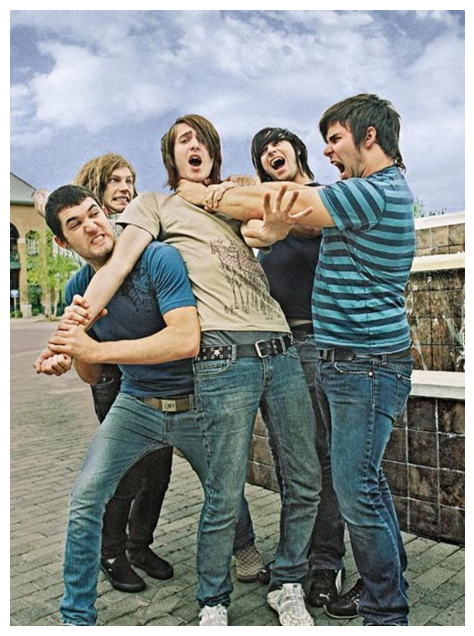

In [4]:
# Read the downloaded image using OpenCV
image = cv2.imread("image.jpg")

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(12,8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


### Step 3: Loading the DNN network

### Task 4: Prepare the Image and Run the Network

### Task 5: Label and Visualize the Image

### Task 6: Run Performance Test

In [ ]:
# Initialize the resnet_results here: 

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        # Add your code to consolidate the resnet_results array here: 

        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

plt.imshow(image)
plt.show()

# Add the code to measure the performance of model here: 


### Task 7a: Prepare the Image and Run the Detector

### Task 7b: Run the Detector

### Task 8: Label the Image and Visualize the Result

### Task 9: Run Performance Test

In [ ]:
# Initialize dlib_results here: 

for result in faces:
    x = result.left()
    y = result.top()
    x1 = result.right()
    y1 = result.bottom()
    # Add your code to consolidate the array here: 

    cv2.rectangle(image, (x, y), (x1, y1), (0, 0, 255), 2)
plt.imshow(image)
plt.show()

# Add the code to measure the performance of model here: 
testResults.test(dlib_results)